In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import inspect, os
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
grand_parentdir = os.path.dirname(os.path.dirname(currentdir))
os.sys.path.insert(0,grand_parentdir) 

from src.campaign_analysis import *
from src.conversion_analysis import get_conversion_clicks, plot_conversion_rate,get_conversion_rate_breakdowns
from db_utils import get_hive_timespan, query_hive_ssh

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from dateutil import relativedelta


## Set-Up Code

In [9]:
start = '2015-10-22 12:00'
stop = (datetime.utcnow() - relativedelta.relativedelta(hours=5)).strftime('%Y-%m-%d %H:00')

dsk_campaign = 'C1516_frFR_dsk_hi_FR'
mob_campaign = 'C1516_frFR_mob_hi_FR'
ipd_campaign = 'C1516_frFR_ipd_hi_FR'

country_code = 'FR'
project = 'fr.wikipedia'

agg = 24
rate_agg = 24

all_regs, device_regs, size_regs, dsk_regs,mob_regs, ipd_regs, lg_regs, sm_regs  = get_regs(dsk_campaign, mob_campaign, ipd_campaign)


In [4]:
# fetch data
click = get_clicks(start, stop)
don = get_donations(start, stop)
imp = get_impressions(start, stop)
pv = get_pageviews(start, stop, country_code, project)

# Pageviews vs. Impression by device

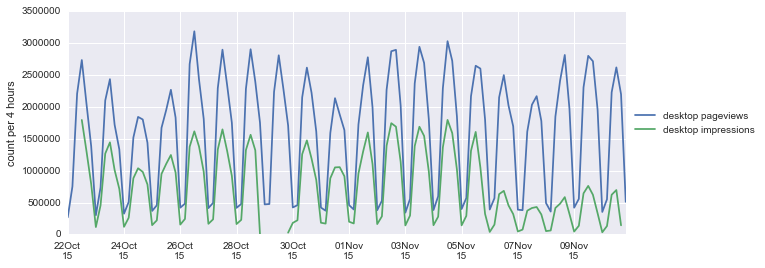

In [10]:
plot_traffic(pv, imp, 'desktop', device_regs['Desktop'], start, stop, hours = agg)

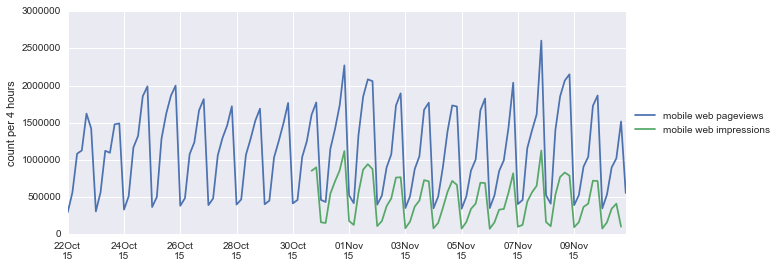

In [6]:
plot_traffic(pv, imp, 'mobile web', device_regs['Mobile'], start, stop, hours = agg)

## Impressions: Large vs Small By Device  

110
110


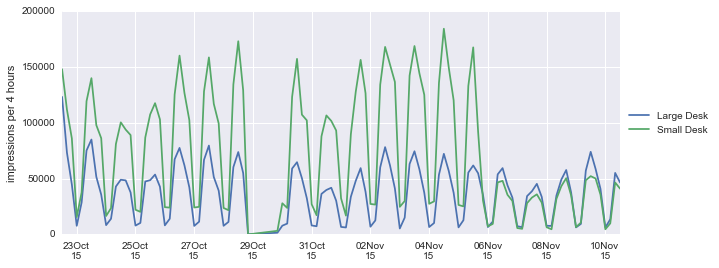

In [43]:
config = {
            'hours' :agg, 
            'ylabel': 'impressions per %d hours' % agg
}

plot_by_time(imp, dsk_regs, **config )


110


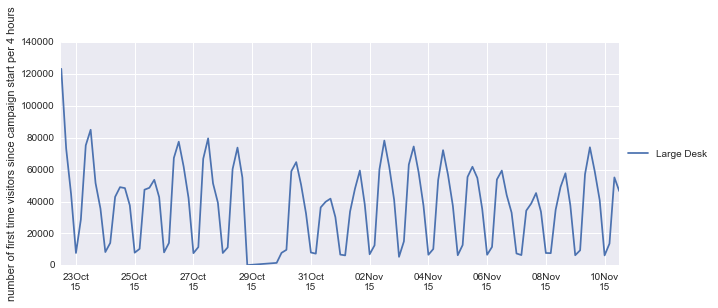

In [44]:
config = {
            'hours' :agg, 
            'start': start,
            'ylabel': 'number of first time visitors since campaign start per %d hours' % agg
}

d = plot_by_time(imp, {'Large Desk': dsk_regs['Large Desk']}, **config )

66
66


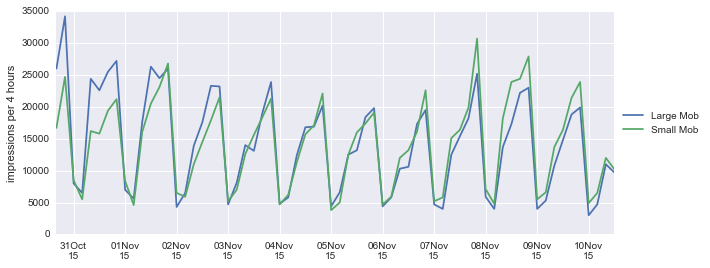

In [45]:
config = {
            'hours' :agg, 
            'start': '2014-12-1 00',
            'ylabel': 'impressions per %d hours' % agg

}
plot_by_time(imp, mob_regs, **config )


66
66


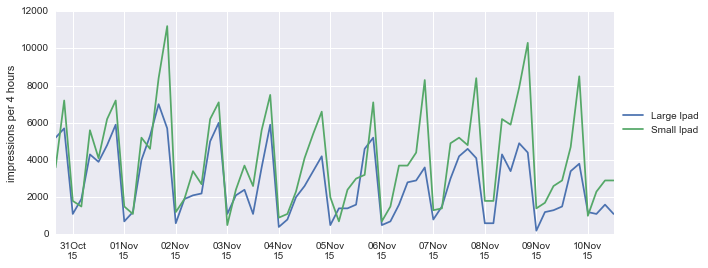

In [46]:
config = {
            'hours' :agg, 
            'ylabel': 'impressions per %d hours' % agg
}
plot_by_time(imp, ipd_regs, **config )

## Donations: Large vs Small By Device 

115
115


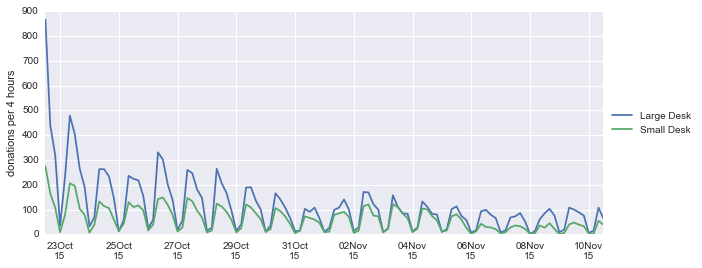

In [47]:
config = {
            'hours' :agg, 
            'ylabel': 'donations per %d hours' % agg
}

plot_by_time(don, dsk_regs, **config)


63
63


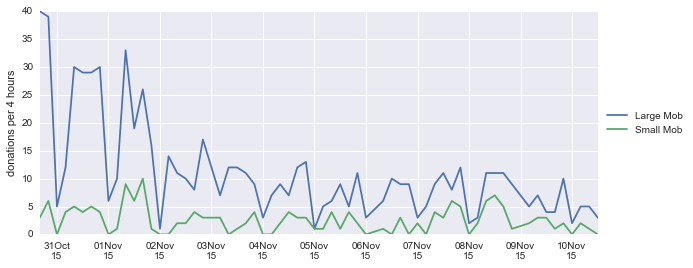

In [48]:
config = {
            'hours' :agg, 
            'ylabel': 'donations per %d hours' % agg
}
plot_by_time(don, mob_regs, **config )


58
58


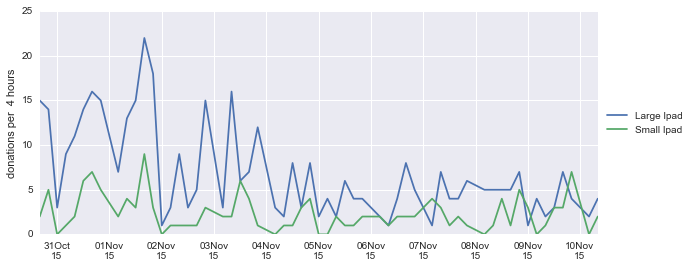

In [49]:
config = {
            'hours' :agg, 
            'start': start,
            'ylabel': 'donations per  %d hours' % agg
}
plot_by_time(don, ipd_regs, **config )



# Donation Rate: Large vs Small By Device

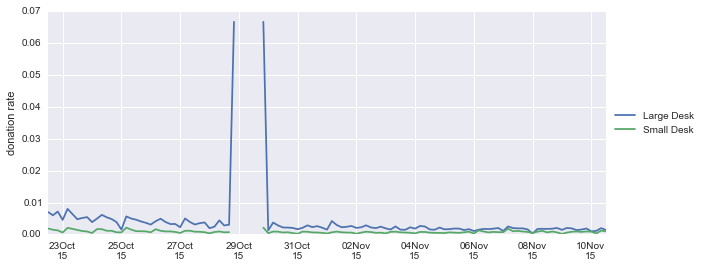

In [50]:
plot_rate_by_time(don, imp, dsk_regs, hours = agg)

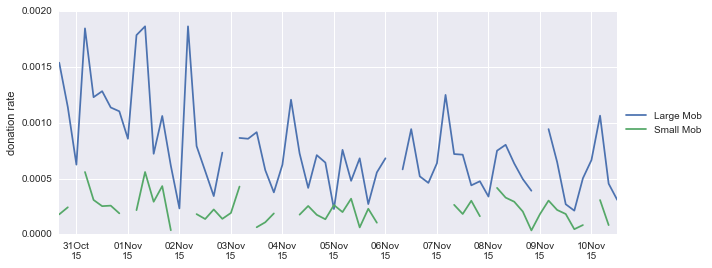

In [51]:
plot_rate_by_time(don, imp, mob_regs, hours = agg )

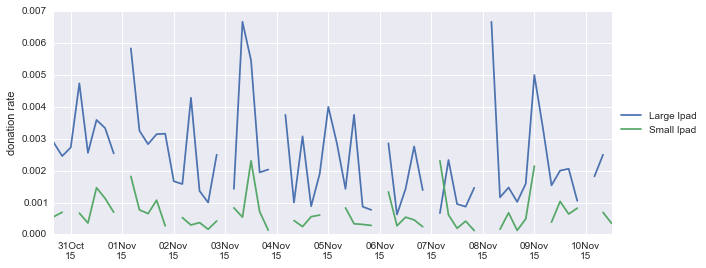

In [52]:
plot_rate_by_time(don, imp, ipd_regs, hours = agg )

## Large Banner Donation Rate By Device

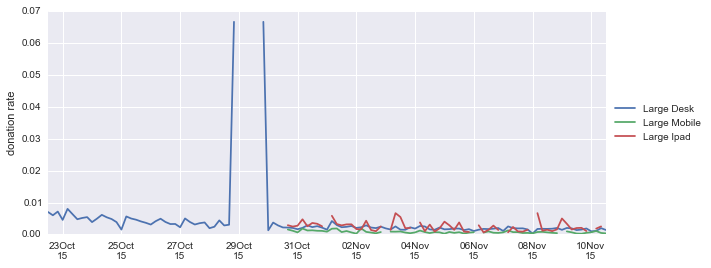

In [53]:
plot_rate_by_time(don, imp, lg_regs, hours = rate_agg )

## Small Banner Donation Rate By Device

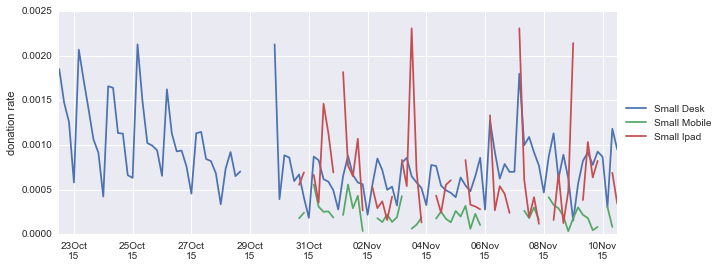

In [54]:
plot_rate_by_time(don, imp, sm_regs, hours = rate_agg )

## Amount/Day by Banner Size

20
20


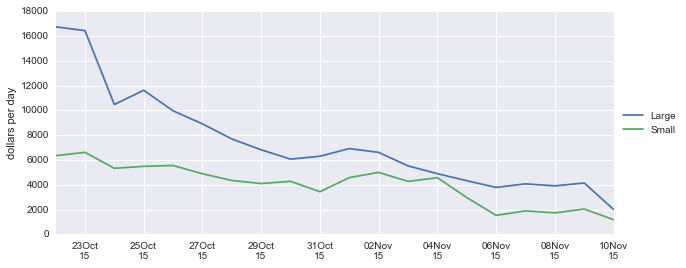

In [55]:
config = {
        'hours' : 24, 
        'amount' : True,
        'ylabel' : 'dollars per day'
}

fig = plot_by_time(don, size_regs, **config )

## Amount/Day by Device

20
20
20


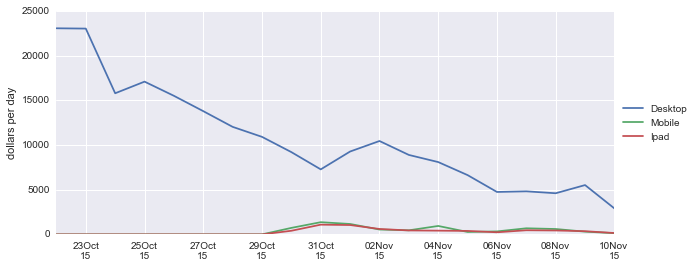

In [56]:
config = {
        'hours' : 24, 
        'amount' : True,
        'start' : '2014-12-3 00',
        'ylabel' : 'dollars per day'
}


fig = plot_by_time(don, device_regs, **config )

## Cumulative Total per Day By Device

20
20
20


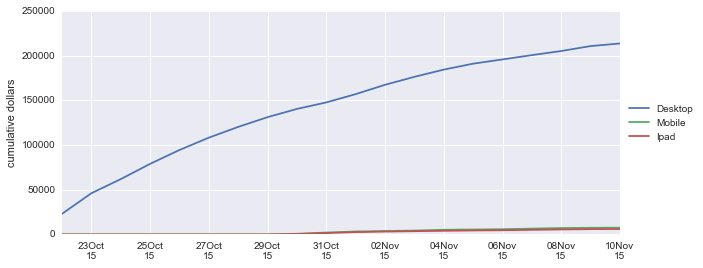

In [57]:
config = {
    'hours': 24,
    'amount': True,
    'cum' : True,
    'ylabel' : 'cumulative dollars',
    'interactive': False,
    'normalize' : False
}

plot_by_time(don, device_regs , **config)


## Quick view of Donation Amount Totals

In [58]:
get_dollar_break_downs(don, all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
Dollars,137384,76473,5421,2138,4463,1598


In [59]:
get_dollar_break_downs(don, size_regs)

,Large,Small
Dollars,147268,80210


In [60]:
get_dollar_break_downs(don, device_regs)

,Desktop,Mobile,Ipad
Dollars,213857,7559,6061


## Quick View of Donation Number totals

In [61]:
get_donation_number_break_downs(don, all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
# Donations,13454,7116,701,165,394,137


In [62]:
get_donation_number_break_downs(don, size_regs)

,Large,Small
# Donations,14549,7418


In [63]:
get_donation_number_break_downs(don, device_regs)

,Desktop,Mobile,Ipad
# Donations,20570,866,531


## Quick View of Average Donations

In [64]:
get_average_donation_break_downs(don, all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
Average Donations Amount,10.21,10.75,7.73,12.96,11.33,11.67


In [65]:
get_average_donation_break_downs(don, size_regs)

,Large,Small
Average Donations Amount,10.12,10.81


In [66]:
get_average_donation_break_downs(don, device_regs)

,Desktop,Mobile,Ipad
Average Donations Amount,10.40,8.73,11.42


## Quick View of Impression Number Totals

In [67]:
get_impression_break_downs(imp, all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
# Impressions,4165400,8020100,941000,930800,183700,265900


In [68]:
get_impression_break_downs(imp, size_regs)

,Large,Small
# Impressions,5290100,9216800


In [69]:
get_impression_break_downs(imp, device_regs)

,Desktop,Mobile,Ipad
# Impressions,12185500,1871800,449600


## Quick View of Donation Rates

In [70]:
get_donation_rate_break_downs(don, imp, all_regs)

,Desktop Large,Desktop Small,Mobile Large,Mobile Small,Ipad Large,Ipad Samll
Donation Rate,0.00323,0.00089,0.00074,0.00018,0.00214,0.00052


In [71]:
get_donation_rate_break_downs(don, imp, size_regs)

,Large,Small
Donation Rate,0.00275,0.00080


In [72]:
get_donation_rate_break_downs(don, imp, device_regs)

,Desktop,Mobile,Ipad
Donation Rate,0.00169,0.00046,0.00118


# Conversion Rates by device and processor

In [39]:
conv_dsk = get_conversion_clicks(start, stop, dsk_campaign)
conv_mob = get_conversion_clicks(start, stop, mob_campaign)
conv_ipd = get_conversion_clicks(start, stop, ipd_campaign)

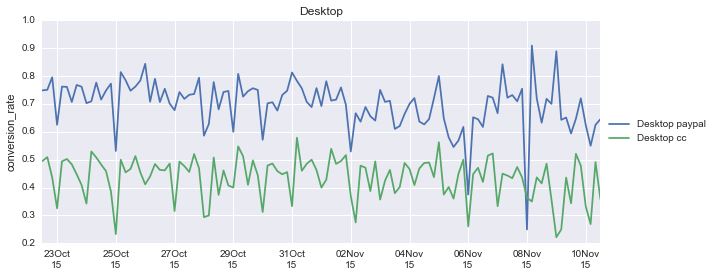

In [74]:
plot_conversion_rate(conv_dsk ,device_regs, hours = agg, title = 'Desktop' )

In [95]:
get_conversion_rate_breakdowns(conv_dsk, device_regs)

,Desktop paypal,Desktop cc
Conversion,0.716961,0.46107


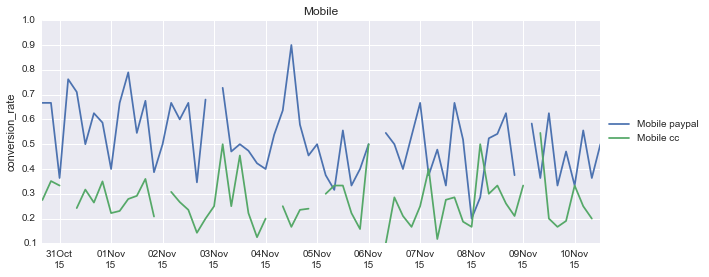

In [77]:
plot_conversion_rate(conv_mob ,device_regs, hours = agg, title = 'Mobile' )

In [96]:
get_conversion_rate_breakdowns(conv_mob, device_regs)

,Mobile paypal,Mobile cc
Conversion,0.54021,0.252289


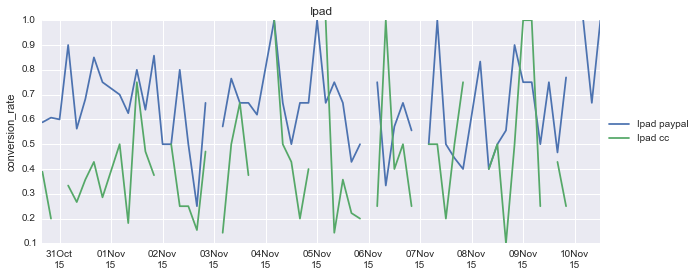

In [78]:
plot_conversion_rate(conv_ipd ,device_regs, hours = agg, title = 'Ipad' )

In [97]:
get_conversion_rate_breakdowns(conv_ipd, device_regs)

,Ipad paypal,Ipad cc
Conversion,0.644891,0.361386
